In [1]:
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2024-01-18 01:56:20.869440: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 01:56:20.891139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 01:56:20.891164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 01:56:20.891178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 01:56:20.895646: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1854073360465441617
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5607784448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9704897508289553362
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-01-18 01:56:21.960050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:21.963138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:21.963157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:22.606784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:22.606816: I tensorflow/compile

In [3]:
os.chdir("/mnt/")

NameError: name 'os' is not defined

In [9]:
rm -rf Data

In [10]:
!git clone https://github.com/Annaantonin/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 74 (delta 9), reused 4 (delta 4), pack-reused 55
Receiving objects: 100% (74/74), 3.40 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [11]:
import Data as data

In [4]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ****************

In [5]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 'output_ukF.mat',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [3]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat

import matplotlib.pyplot as plt


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
# % SDOF System Parameters
# m = 5.0;       % Mass (kg)
# k = 10.0;     % Stiffness (N/m)
# c = 0.22;      % Damping coefficient (Ns/m)
# dt=0.001

def load_data(noise):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/3_Dof_NoisySin_2000.mat")
    # data = sio.loadmat(r"C:\Users\Antonina\My Drive\CU_work\PINN project\3_Dof_NoisySin_2000.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    t_train, x_tt_train =data["t"],data["a"]
    
    x1_tt_train, x2_tt_train, x3_tt_train= data["a1"],data["a2"], data["a3"]
    print(x1_tt_train.shape)
    x_train, f_train, f3_train = data["u"], data["F"], data['f3']
    n=1000
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x1_tt_train[0:n], x2_tt_train[0:n], x3_tt_train[0:n], t_train[0:n], x_train[0:n], f_train[0:n], f3_train[0:n]

#m=1
# [0][..., 0:1]     
def pde_fn(t, x1,x2,x3, f1,f2, f3, log_k1, log_k2, log_k3):
 # process_c =should be 3 vectors
    # nn=t.shape
    # n=nn[0]
    print(x1.shape)
    #velocity 
    x1_t = tf.gradients(x1, t)      [0] [..., 0:1]                 
    x2_t = tf.gradients(x2, t)      [0] [..., 0:1]            
    x3_t = tf.gradients(x3, t)      [0] [..., 0:1]       
    #acceleration
    # x1_tt = tf.gradients(x1_t, t)   [0] [..., 0:1] 
    # x2_tt = tf.gradients(x2_t, t)   [0] [..., 0:1] 
    # x3_tt = tf.gradients(x3_t, t)   [0] [..., 0:1] 
  
    # Mass, Damping, and Stiffness Matrices
    M = tf.eye(3, 3)
    C = tf.constant([[0.5+1, -1, 0], [-1, 1+1.5, -1.5], [0, -1.5, 1.5]])
    # print(C)
    # K = [[tf.exp(log_k1)+tf.exp(log_k2), tf.exp(log_k2), 0],
    #      [tf.exp(log_k2), tf.exp(log_k2)+tf.exp(log_k3), -tf.exp(log_k3)],
    #      [0, -tf.exp(log_k3), tf.exp(log_k3)]]
    K = [[100*tf.exp(log_k1)+100*tf.exp(log_k2), -100*tf.exp(log_k2), 0],
         [-100*tf.exp(log_k2), 100*tf.exp(log_k2)+100*tf.exp(log_k3), -100*tf.exp(log_k3)],
         [0, -100*tf.exp(log_k3), 100*tf.exp(log_k3)]]
    print(K, len(K))
    # f1=tf.zeros((n,1))
    # f2=tf.zeros((n,1))
    # print('f',f3.shape)
    F=tf.concat([f1, f2, f3], axis=-1)
    F=tf.transpose(F)
    
    x=tf.concat([x1, x2, x3], axis=-1)
    # print('x1', x1.shape)
    x=tf.transpose(x)
    # x_t = tf.concat([x1_t, x2_t, x3_t], axis=-1)
    # x_t=tf.transpose(x_t)
    x_t=[x1_t, x2_t, x3_t]
    x_t=tf.squeeze(x_t)
    # x=tf.squeeze(x)
    # x_t = tf.stack([x1_t, x2_t, x3_t], axis=0)
    # x_t=tf.dreshape(x_t, [3, n]) 
  
    # x=tf.stack([x1, x2, x3], axis=0)
    # x=tf.reshape(x, [3, n]) 
    # x_t=tf.reshape(x_t,[3,-1])
    print('x_t', x_t.shape)
    print('x', x.shape)
    # x_tt=tf.squeeze(F)-C@x_t-K@x
    x_tt=tf.linalg.inv(M)@(F-C@x_t-K@x)
    # x1_tt=f1-C[0,:]*x_t
    # print('xtt',x_tt[2,:].shape)
    x1_tt, x2_tt, x3_tt=tf.split(x_tt, 3, axis=0)
    # out=tf.concat([x2_tt, x3_tt], axis=-1)
    # print('out', out.shape)
#     for i in tf.range(x.shape):
#          x_tt[i,:]= tf.linalg.solve(M, F[i,:] - (C @ x_t[i,:] + K @x[i,:]))
# tf.concat([f1, f2, f3], axis=-1)
    return x3_tt
    
    # return tf.concat([x_tt[0,:], x_tt[1,:] ], axis=1) # all

def pde_force1(t, x1,x2, log_k1, log_k2): # f3
    x1_t = tf.gradients(x1, t)      [0] [..., 0:1]    
    x2_t = tf.gradients(x2, t)      [0] [..., 0:1]     
    
    x1_tt = tf.gradients(x1_t, t)   [0] [..., 0:1] 
    x2_tt = tf.gradients(x2_t, t)   [0] [..., 0:1]

    
    return x1_tt+((100*tf.exp(log_k1)+100*tf.exp(log_k2))*x1-100*tf.exp(log_k2)*x2)+(0.75*x1_t-0.5*x2_t)


def pde_force3(t, x2,x3, f3, log_k2, log_k3): # f3
    # f1=specific for the EQM solution
    # nn=t.shape
    # n=nn[0]
    #velocity 
    # x1_t = tf.gradients(x1, t)      [0] [..., 0:1]                 
    x2_t = tf.gradients(x2, t)      [0]# [..., 0:1]            
    x3_t = tf.gradients(x3, t)      [0] #[..., 0:1]       
    #acceleration
    # x1_tt = tf.gradients(x1_t, t)   [0] [..., 0:1] 
    x2_tt = tf.gradients(x2_t, t)   [0] #[..., 0:1] 
    x3_tt = tf.gradients(x3_t, t)   [0] #[..., 0:1] 
  
    # Mass, Damping, and Stiffness Matrices
    # M = tf.eye(3, 3)
    
    # C = tf.constant([[0.25+0.5, -0.5, 0], [-0.5, 0.5+0.75, -0.75], [0, -0.75, 0.75]])
    # C = tf.constant([[0.5+1, -1, 0], [-1, 1+1.5, -1.5], [0, -1.5, 1.5]])
    # K = [[9*tf.exp(log_k1)+11*tf.exp(log_k2), -11*tf.exp(log_k2), 0],
    #      [-11*tf.exp(log_k2), 11*tf.exp(log_k2)+13*tf.exp(log_k3), -13*tf.exp(log_k3)],
    #      [0, -13*tf.exp(log_k3), 13*tf.exp(log_k3)]]

    # K = [[100*tf.exp(log_k1)+100*tf.exp(log_k2), -100*tf.exp(log_k2), 0],
    #      [-100*tf.exp(log_k2), 100*tf.exp(log_k2)+100*tf.exp(log_k3), -100*tf.exp(log_k3)],
    #      [0, -100*tf.exp(log_k3), 100*tf.exp(log_k3)]]
    
    # x=tf.concat([x1, x2, x3], axis=1)
    # x_t = tf.concat([x1_t, x2_t, x3_t], axis=1)
    # x_tt = tf.concat([x1_tt, x2_tt, x3_tt], axis=1)
    
    # x=tf.transpose(x)
    # x_t=tf.transpose(x_t)
    # x_tt=tf.transpose(x_tt)
    # print(f1.shape)
    # x=tf.stack([x1, x2, x3], axis=0)
    # x_t = tf.stack([x1_t, x2_t, x3_t], axis=0)
    # x_tt = tf.stack([x1_tt, x2_tt, x3_tt], axis=0)
    # out=tf.transpose(f3)-(tf.transpose(x3_tt)+(-100*tf.exp(log_k3)*tf.transpose(x2)+100*tf.exp(log_k3)*tf.transpose(x3)))   #
    out=f3-(x3_tt+(-100*tf.exp(log_k3)*x2+100*tf.exp(log_k3)*x3)+(-1.5*x2_t+1.5*x3_t))
    print('out', out.shape)
    # print('x3', x3_tt.shape)
    # f1=x1_tt+
    # x=tf.reshape(x, [3, n]) 
    # x_t=tf.reshape(x_t, [3, n])   
    # x_tt=tf.reshape(x_tt, [3, n]) 
    # print('xtt',x_tt.shape)
    # x_tt=tf.inverse(M)@(F-C@x_t-K@x)
    # F=M@x_tt+C@x_t+K@x
    # f1, f2, f3=tf.split(F, 3, axis=0)
    # F[2,:]=f3
    # out=tf.concat([f1,f2], axis=0)
    
    # print('outF',out.shape)
    # return out F[2,:]
    return out

def pde_f3(t,f3):
    return f3

def pde_f1(t,f1):
    return f1
    
def pde_f2(t,f2):
    return f2

def pde3_init(t,x3): # make them alll !!!!! for all dof, velocity +displcements
    x3_t = tf.gradients(x3, t)              [0]  
   
    out=tf.concat([x3[0],x3_t[0]], axis=-1)
    # print('out', out.shape)
    return out

def pde2_init(t,x2): # make them alll !!!!! for all dof, velocity +displcements
    x2_t = tf.gradients(x2, t)            [0]             
    out=tf.concat([x2[0],x2_t[0]], axis=-1)
    return out

def pde_xtt2(t,x2):
    x2_t = tf.gradients(x2, t)            [0] [..., 0:1]                                                                                                                                                                                                             
    x2_tt = tf.gradients(x2_t, t)         [0] [..., 0:1] 
    return x2_tt
    
def pde_xtt3(t,x3):
    x3_t = tf.gradients(x3, t)              [0] [..., 0:1]                                                                                                                                                                                                           
    x3_tt = tf.gradients(x3_t, t)           [0] [..., 0:1] 
    return x3_tt


@neuq.utils.timer
def Trainable(x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers,   ):
    num=10
    # build processes
    process_f1 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# force
    )
    process_f2 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# force
    )
   
    process_f3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num, regularizer=tf.keras.regularizers.l2(1e-5)),# force
    )

    process_x1 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num, regularizer=tf.keras.regularizers.l2(1e-5)),# predicted displacement
    )

    process_x2 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# predicted displacement
    )
    
    process_x3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# predicted displacement
    )
   
    process_log_k1 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=2.5, num=num),
    )
    process_log_k2 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=2.8, num=num),
    )
    process_log_k3 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=3, num=num),
    )
    
    method = neuq.inferences.DEns(
        num_samples=1, num_iterations=40000, optimizer=tf.train.AdamOptimizer(1e-3),  is_parallelized=True,
    )

    # build losses
    # loss_x1 = neuq.likelihoods.MSE(
    
    #     inputs=t_train,
    #     targets=x_tt_train[:,0], 
    #     processes=[process_x1],
    #     pde=pde_xtt1, # dotdot _X
    #     multiplier=1.0,
    # )

    #### F1, F2, fit the data directly 
    

    loss3_init = neuq.likelihoods.MSE(
        inputs=t_train[0:1],
        targets=[0,0], # 
         # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x3], # tf train
        pde=pde3_init,
        multiplier=1,
    )   
    loss2_init = neuq.likelihoods.MSE(
        inputs=t_train[0:1],
        targets=[0,0], # 
         # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x2], # tf train
        pde=pde2_init,
        multiplier=1,
    ) 

    loss_f3 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f3_train, 
        processes=[process_f3],
        pde=pde_f3, # dotdot _X
        multiplier=0,
    )
    loss_f1 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f_train[:,0],
        processes=[process_f1],
        pde=pde_f1, # dotdot _X
        multiplier=1,
    )
    loss_f2 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f_train[:,1], 
        processes=[process_f2],
        pde=pde_f2, # dotdot _X
        multiplier=1,
    )
    loss_x2 = neuq.likelihoods.MSE(
        inputs=t_train, 
        targets=x2_tt_train, 
        processes=[process_x2],
        pde=pde_xtt2, # dotdot _X
        multiplier=1,
    )
    loss_x3 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x3_tt_train, 
        processes=[process_x3],
        pde=pde_xtt3, # dotdot _X
        multiplier=1,
    )
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        # targets=np.concatenate([x2_tt_train, x3_tt_train], axis=0), # f_train  CHANGE!!!!
        targets=x3_tt_train,
        # targets=x_tt_train.T, # f_train  CHANGE!!!!
        processes=[process_x1, process_x2, process_x3, process_f1 ,process_f2, process_f3, process_log_k1, process_log_k2, process_log_k3], # tf train
        pde=pde_fn,
        multiplier=0,
    )
    loss_force1=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f_train[:,0],
        # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
        processes=[ process_x1, process_x2, process_log_k1, process_log_k2], # tf train
        pde=pde_force1,
        multiplier=1,
    )
    
    loss_force3=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f3_train,
        # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
        processes=[ process_x2, process_x3, process_f3, process_log_k2, process_log_k3], # tf train
        pde=pde_force3,
        multiplier=1,
    )

    # build model
    model = neuq.models.Model(
        processes=[process_x1, process_x2, process_x3, process_f1, process_f2, process_f3, process_log_k1, process_log_k2, process_log_k3],
        likelihoods=[loss_x2, loss_x3, loss_f1, loss_f2, loss_force3, loss_force1, loss2_init, loss3_init],  #, loss_f1, loss_f2, loss2_init, loss3_init
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()

    processes=[process_x1, process_x2, process_x3, process_f1 ,process_f2 , process_f3, process_log_k1, process_log_k2, process_log_k3]
    return processes, samples, model


if __name__ == "__main__":
    
    noise = 0

    x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, f3_train = load_data(noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1, 20, 20, 1]
    # layers_force = [1, 20, 20, 1]
    processes, samples, model = Trainable(x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers,  )

    x1_pred, x2_pred, x3_pred, f1_pred, f2_pred, f3_pred, logk1_pred, logk2_pred, logk3_pred = model.predict(t_train, samples, processes, pde_fn=None)

(2000, 1)


2024-01-18 01:56:38.237324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:38.237384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:38.237395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:38.237601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 01:56:38.237622: I tensorflow/compile

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

out (10, 1000, 1)


2024-01-18 01:56:39.326310: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_38/Assign' id:501 op device:{requested: '', assigned: ''} def:{{{node Variable_38/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_38, Const_2)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  1866599.4
Iteration:  1000 , loss:  90.73908
Iteration:  2000 , loss:  21.222837
Iteration:  3000 , loss:  14.54749
Iteration:  4000 , loss:  14.803501
Iteration:  5000 , loss:  19.36348
Iteration:  6000 , loss:  34.363186
Iteration:  7000 , loss:  76.749626
Iteration:  8000 , loss:  17.161224
Iteration:  9000 , loss:  33.701286
Iteration:  10000 , loss:  14.504806
Iteration:  11000 , loss:  65.04607
Iteration:  12000 , loss:  12.576699
Iteration:  13000 , loss:  11.0279665
Iteration:  14000 , loss:  11.096871
Iteration:  15000 , loss:  10.519909
Iteration:  16000 , loss:  13.457225
Iteration:  17000 , loss:  100.581604
Iteration:  18000 , loss:  11.636818
Iteration:  19000 , loss:  13.374061
Iteration:  20000 , loss:  286.3198
Iteration:  21000 , loss:  9.169042
Iteration:  22000 , loss:  28.434734
Iteration:  23000 , loss:  21.894272
Iteration:  24000 , loss:  9.570032
Iteration:  25000 , loss:  33.187916
Iteration:  26000 , loss:  8.453586
Iteration:  27000 , 

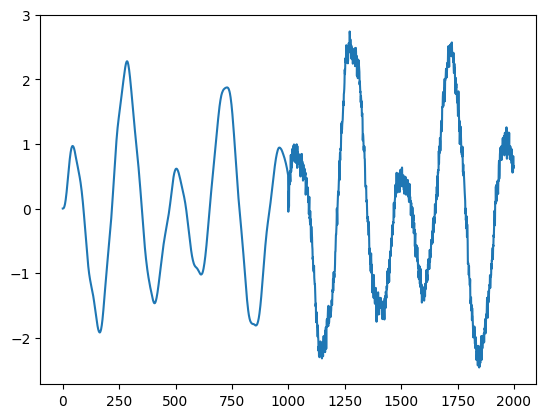

In [253]:
# x1_pred, x2_pred, x3_pred,  f3_pred, logk1_pred, logk2_pred, logk3_pred = model.predict(t_train, samples, processes, pde_fn=None)
targets=np.concatenate([x2_tt_train, x3_tt_train], axis=0)
plt.plot(targets)

In [ ]:
log_k3=np.log(13)
x3_tt=x3_tt_train
x2=x_train[:,1]
x3=x_train[:,2]
f3=x3_tt.T+(-100*np.exp(log_k3)*x2.T+100*np.exp(log_k3)*x3.T)
plt.plot(f3.T)

In [ ]:
a=np.concatenate([f_train[:,0], f_train[:,1]], axis=-1)
plt.plot(a)

In [152]:
f_train.shape

(1000, 3)

In [ ]:
plt.plot(out)
# plt.plot(x_train[:,0],'r',label='Actual displacement')

In [120]:
# targets=np.reshape(x_tt_train, [-1]), # f_train  CHANGE!!!!
# np.shape(targets)
# x_tt_train.shape
x1=x_train[:,0]
print(x1.shape)

(1000,)


In [19]:
(x_tt_pred, ) = model.predict(t_train, samples, processes, pde_fn=pde_force1)


TypeError: pde_force1() takes 5 positional arguments but 10 were given

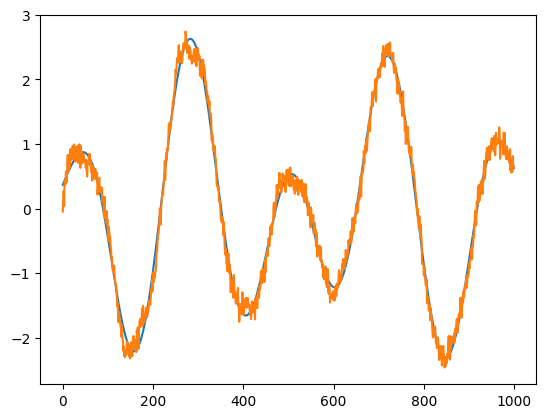

In [7]:
x_tt_pred.shape
plt.plot(x_tt_pred[0,:,0])
plt.plot(x3_tt_train)

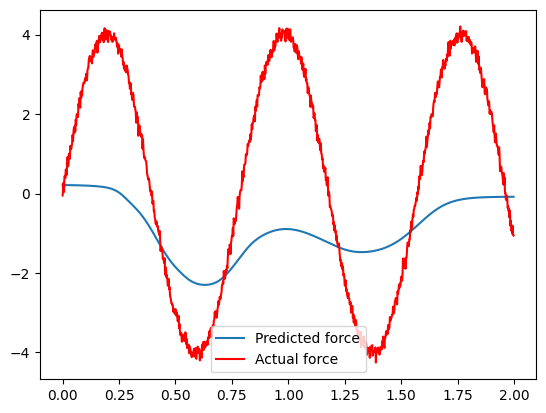

In [13]:
plt.plot(t_train,np.mean(f3_pred,axis=(0, 2)),label='Predicted force')
plt.plot(t_train,f3_train,'r',label='Actual force')
plt.legend()

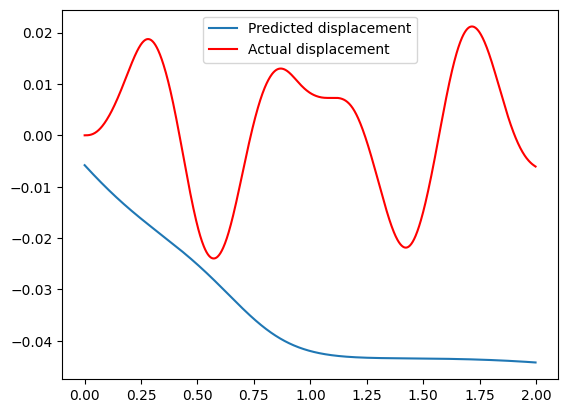

In [14]:
plt.plot(t_train,np.mean(x3_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train[:,2],'r',label='Actual displacement')
plt.legend()

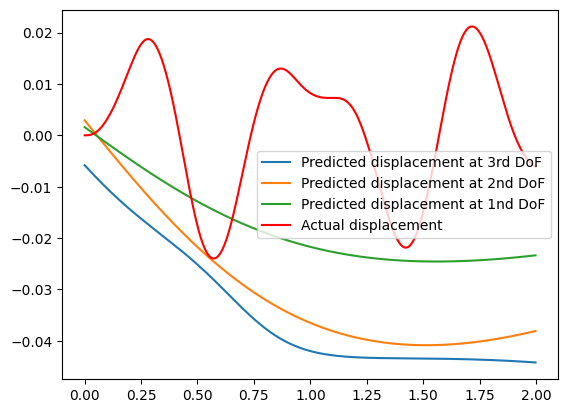

In [15]:
plt.plot(t_train,np.mean(x3_pred,axis=(0, 2)),label='Predicted displacement at 3rd DoF')
plt.plot(t_train,np.mean(x2_pred,axis=(0, 2)),label='Predicted displacement at 2nd DoF')
plt.plot(t_train,np.mean(x1_pred,axis=(0, 2)),label='Predicted displacement at 1nd DoF')
plt.plot(t_train,x_train[:,2],'r',label='Actual displacement')
plt.legend()

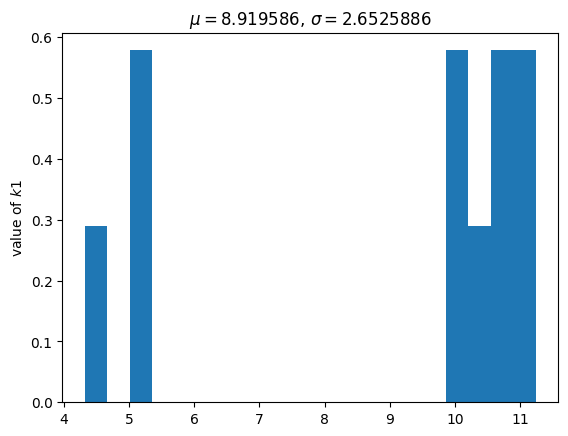

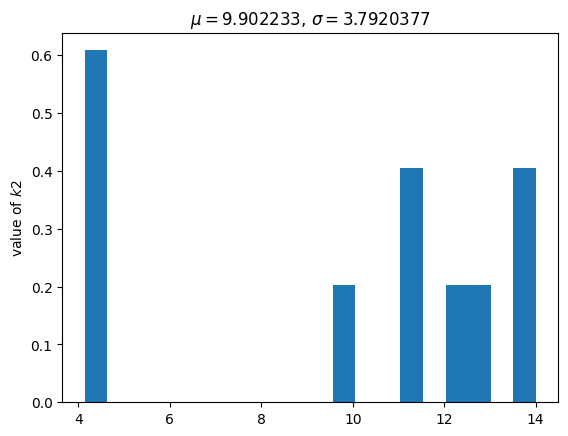

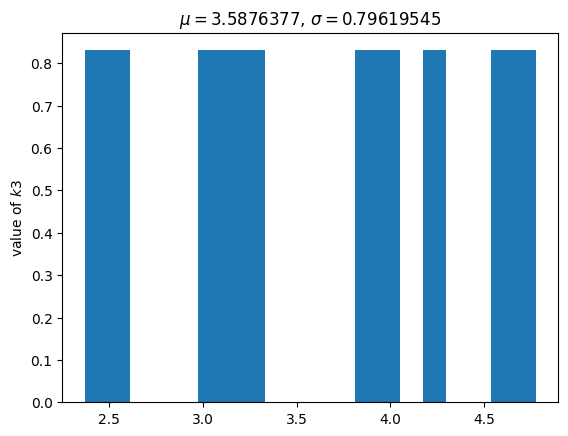

In [16]:
neuq.utils.hist(np.exp(logk1_pred).flatten(), name="value of $k1$")
neuq.utils.hist(np.exp(logk2_pred).flatten(), name="value of $k2$")
neuq.utils.hist(np.exp(logk3_pred).flatten(), name="value of $k3$")

In [20]:
[a.shape for a in samples]

[(1, 1, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 1),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 1),
 (1, 1, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 1),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 1),
 (1, 1, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 1),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 1),
 (1, 1, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 100),
 (1, 100, 1),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 100),
 (1, 1, 1),
 (1,),
 (1,),
 (1,)]

In [ ]:
unc_f=np.std(f_pred,axis=0)
plt.plot(unc_f)
plt.figure()
unc_x=np.std(x_pred,axis=0)
plt.plot(unc_x)

In [ ]:
Csamp=samples[12]    
Ksamp=samples[13]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 

In [ ]:
# plt.figure
# plt.plot(aa[:,0,0],'r')

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [ ]:
data_to_save = {
   "x_pred":x_pred, "f_pred":f_pred, "c":samples[12].flatten(),"k":samples[13].flatten()
}
file_name = 'output_ukF.mat'
sio.savemat(file_name, data_to_save)